In [11]:
#Import necessary packages
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import matplotlib.hatch
from matplotlib.patches import Polygon


### Data Extraction

In [12]:
#Pull data for each case study and SAF blend level
this_file_path = os.getcwd()

Case_data = {}

Cases = [1,2,3,4]
for i in Cases:
    Case_data[i] = {} #Empty dict to hold data for each case study
    Case_data[i]['mill'] = {} #Empty dict for mill data for each blend
    Case_data[i]['ref'] = {} #Empty dict for refinery data for each blend
    Case_data[i]['air'] = {} #Empty dict for airport data for each blend

#Loop through SAF blend levels
    for b in [0,10,20,30,40,50]:
        Case_data[i]['mill'][b] = pd.read_csv(this_file_path + '\\Case' + str(i) + '\\interest_mid_blend_' + str(b) + '\\key_results_mills.csv')
        Case_data[i]['ref'][b] = pd.read_csv(this_file_path + '\\Case' + str(i) + '\\interest_mid_blend_' + str(b) + '\\key_results_ref.csv')
        Case_data[i]['air'][b] = pd.read_csv(this_file_path + '\\Case' + str(i) + '\\interest_mid_blend_' + str(b) + '\\key_results_air.csv')


In [13]:
#For each blend sum the total: OPEX, CAPEX, logistics cost, external gasoline cost, conventional jet fuel cost, sugar, 
#ethanol (market), ethanol (mills), SAF, gasoline, purchased gasoline, and conventional jet fuel

Cases = [1,2,3,4]

Cost = {}
Materials = {}

for i in Cases:
    #Create a cost and material dictionary for each case to hold individual case study data
    Cost[i] = {}
    Materials[i] = {}
    #initialize arrays to hold summations
    #Costs
    opex = []
    capex = []
    logistic = []
    exgas_c = []
    convjet_c = []
    tot_cost = []
    tot_prof = []

    #Materials
    sugar = []
    eth_mk = []
    SAF = []
    gas = []
    exgas_m = []
    convjet_m = []

    #Loop through each SAF blend level
    for j in Case_data[i]['mill'].keys():
        #Cost
        o = 0
        c = 0
        l = 0
        #Material
        s = 0
        emk = 0
        emi = 0
        saf = 0
        g = 0 


        #Loop through Mills
        for k in range(len(Case_data[i]['mill'][j])):
            #Cost
            o = o + Case_data[i]['mill'][j]['OPEX'][k]
            c = c + Case_data[i]['mill'][j]['CAPEX'][k]
            l = l + Case_data[i]['mill'][j]['logistic'][k]
            #Product
            s = s + Case_data[i]['mill'][j]['sug'][k]
            emk = emk + Case_data[i]['mill'][j]['etmk'][k]
            emi = emi + Case_data[i]['mill'][j]['etref'][k]
            saf = saf + Case_data[i]['mill'][j]['SAF'][k]
            g = g + Case_data[i]['mill'][j]['g'][k]

        #Loop through Refineries
        for k in range(len(Case_data[i]['ref'][j])):
            #Add refinery costs
            o = o + Case_data[i]['ref'][j]['OPEX'][k]
            c = c + Case_data[i]['ref'][j]['CAPEX'][k]
            #Add refinery materials
            saf = saf + Case_data[i]['ref'][j]['SAF'][k]
            g = g + Case_data[i]['ref'][j]['g'][k]

        #Append Summations to Arrays
        #Summed Costs
        opex.append(o)
        capex.append(c)
        logistic.append(l)
        #Constant Costs
        exgas_c.append(Case_data[i]['air'][j]['gasoline'][0]*2600)
        convjet_c.append(Case_data[i]['air'][j]['jet fuel'][0]*4129)
        tot_cost.append(Case_data[i]['mill'][j]['sc cost'][1])
        tot_prof.append(Case_data[i]['mill'][j]['profit'][1])

        #Summed Materials 
        sugar.append(s)
        eth_mk.append(emk)
        SAF.append(saf)
        gas.append(g)
        #Constant Materials
        exgas_m.append(Case_data[i]['air'][j]['gasoline'][0])
        convjet_m.append(Case_data[i]['air'][j]['jet fuel'][0])


    Cost[i] = {
        'OPEX': np.array(opex)/1e9,
        'External Gasoline': np.array(exgas_c)/1e9,
        'Conventional Jet Fuel': np.array(convjet_c)/1e9,
        'CAPEX': np.array(capex)/1e9,
        'Logistic': np.array(logistic)/1e9,
        'Total Cost': np.array(tot_cost)/1e9,
        'Total Profit': np.array(tot_prof)/1e9
    }

    Materials[i] = {
        'Sugar': np.array(sugar)/1e6,
        'Ethanol (market)': np.array(eth_mk)/1e6,
        'SAF': np.array(SAF)/1e6,
        'Gasoline': np.array(gas)/1e6,
        'External Gasoline': np.array(exgas_m)/1e6,
        'Conventional Jet Fuel': np.array(convjet_m)/1e6,
    }


# Supply Chain Cost Summary

<>:66: SyntaxWarning: invalid escape sequence '\$'
<>:66: SyntaxWarning: invalid escape sequence '\$'
C:\Users\mwatson4\AppData\Local\Temp\ipykernel_11536\2788637151.py:66: SyntaxWarning: invalid escape sequence '\$'
  ax[2].set_ylabel('Cost (B R\$ year$^{-1}$)', fontweight='bold', fontsize=16)


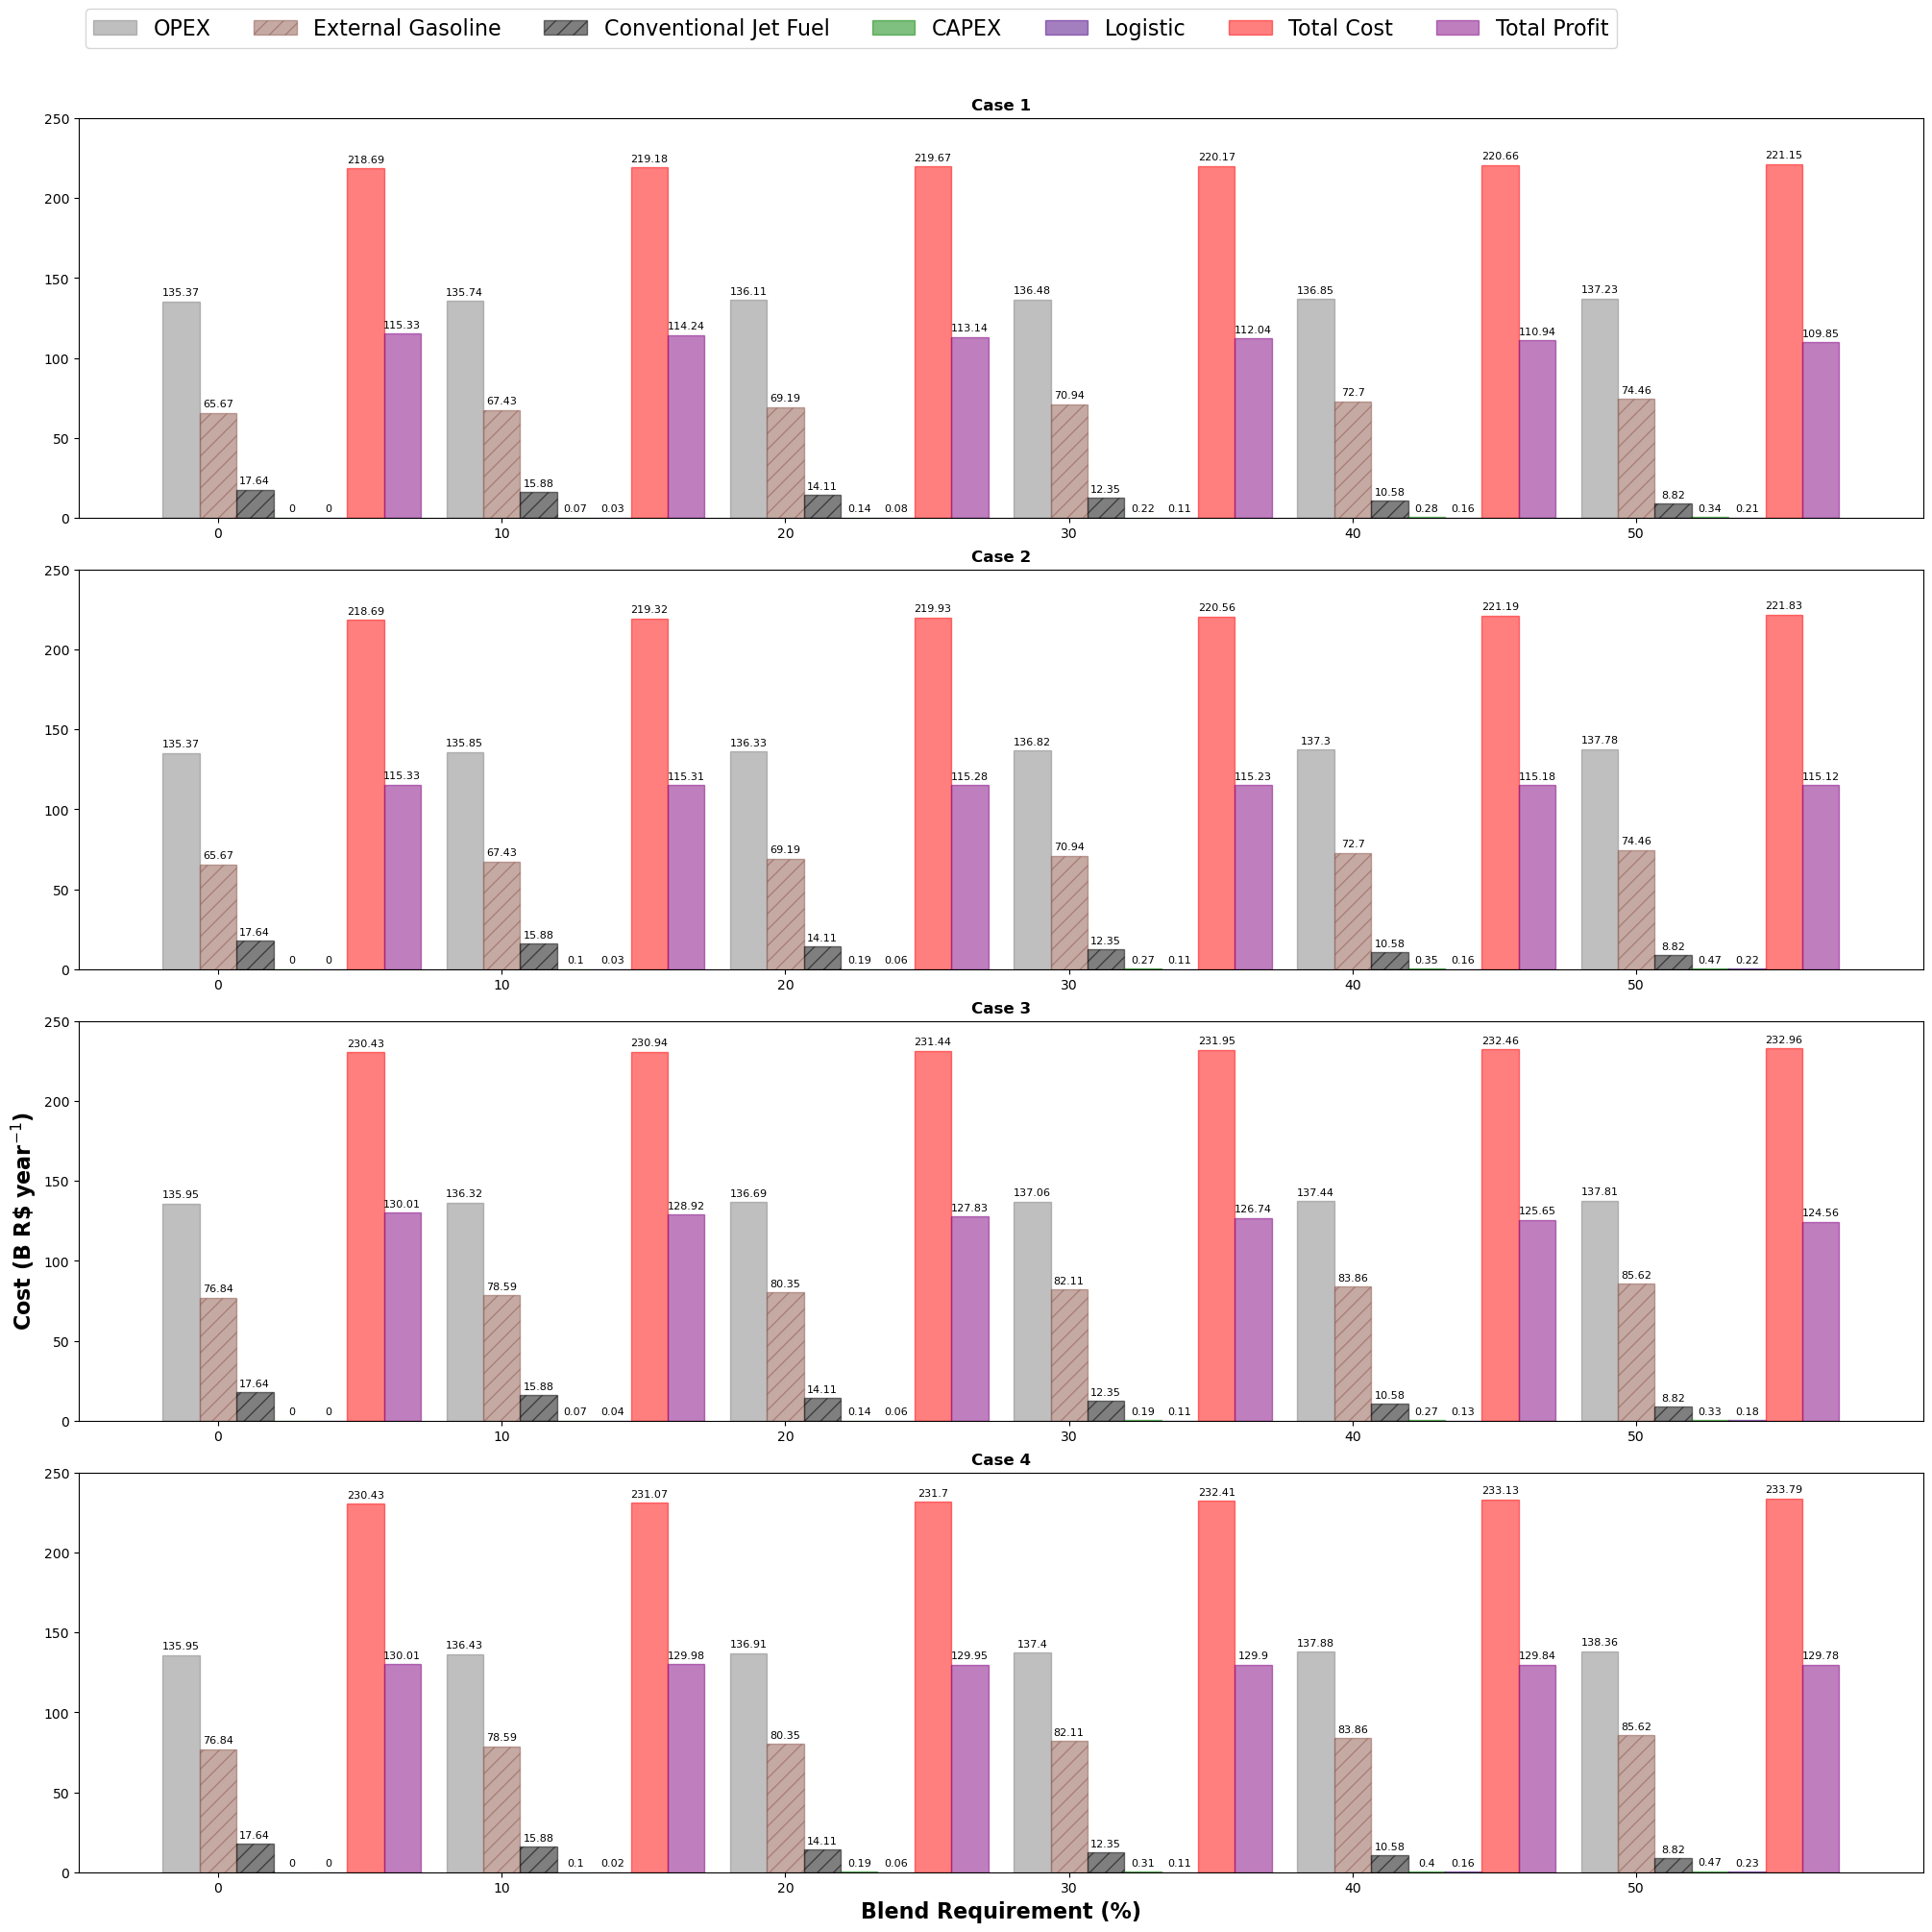

In [14]:
b = [0,10,20,30,40,50]
x = np.arange(len(b))  # the label locations
width = 0.13  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(4,1,figsize = (20,20),layout='constrained')

#Case 1
colors = ['gray','tab:brown','black','green','indigo', 'red', 'purple']
hatchs = [None,'//','//',None,None, None, None]
i = 0
for attribute, measurement in Cost[1].items():
    offset = width * multiplier
    rects = ax[0].bar(x + offset, np.round(measurement,2), width, label=attribute, color = colors[i], hatch = hatchs[i],alpha=0.5, edgecolor=colors[i])
    ax[0].bar_label(rects, padding=3, fontsize = 8)
    multiplier += 1
    i += 1

ax[0].set_xticks(x + width, b)
ax[0].set_ylim(0, 250)
ax[0].set_title('Case 1', fontweight = 'bold')

#Case 3
i = 0
multiplier = 0
for attribute, measurement in Cost[3].items():
    offset = width * multiplier
    rects = ax[2].bar(x + offset, np.round(measurement,2), width, label=attribute, color = colors[i], hatch = hatchs[i],alpha=0.5, edgecolor=colors[i])
    ax[2].bar_label(rects, padding=3,fontsize = 8)
    multiplier += 1
    i += 1

ax[2].set_xticks(x + width, b)
ax[2].set_ylim(0, 250)
ax[2].set_title('Case 3', fontweight = 'bold')

#Case 2
i = 0
multiplier = 0
for attribute, measurement in Cost[2].items():
    offset = width * multiplier
    rects = ax[1].bar(x + offset, np.round(measurement,2), width, label=attribute, color = colors[i], hatch = hatchs[i],alpha=0.5, edgecolor=colors[i])
    ax[1].bar_label(rects, padding=3,fontsize = 8)
    multiplier += 1
    i += 1

ax[1].set_xticks(x + width, b)
ax[1].set_ylim(0, 250)
ax[1].set_title('Case 2', fontweight = 'bold')

#Case 4
i = 0
multiplier = 0
for attribute, measurement in Cost[4].items():
    offset = width * multiplier
    rects = ax[3].bar(x + offset, np.round(measurement,2), width, label=attribute, color = colors[i], hatch = hatchs[i],alpha=0.5, edgecolor=colors[i])
    ax[3].bar_label(rects, padding=3,fontsize = 8)
    multiplier += 1
    i += 1

ax[3].set_xticks(x + width, b)
ax[3].set_ylim(0, 250)
ax[3].set_title('Case 4', fontweight = 'bold')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[2].set_ylabel('Cost (B R\$ year$^{-1}$)', fontweight='bold', fontsize=16)
ax[3].set_xlabel('Blend Requirement (%)', fontweight='bold', fontsize=16)
ax[0].legend(bbox_to_anchor=(.84, 1.3), ncols=7, fontsize = 16)

plt.savefig('Results_Figures/fourpanelcostsummary.png',bbox_inches='tight', dpi=500)
plt.show()

# Supply Chain Material Summary

<>:91: SyntaxWarning: invalid escape sequence '\$'
<>:103: SyntaxWarning: invalid escape sequence '\$'
<>:91: SyntaxWarning: invalid escape sequence '\$'
<>:103: SyntaxWarning: invalid escape sequence '\$'
C:\Users\mwatson4\AppData\Local\Temp\ipykernel_11536\81738653.py:91: SyntaxWarning: invalid escape sequence '\$'
  ax[2,1].set_ylabel('Cost (B R\$ year$^{-1}$)', fontweight='bold', fontsize=12)
C:\Users\mwatson4\AppData\Local\Temp\ipykernel_11536\81738653.py:103: SyntaxWarning: invalid escape sequence '\$'
  ax[2,2].set_ylabel('Profit (B R\$ year$^{-1}$)', fontweight='bold', fontsize=12)


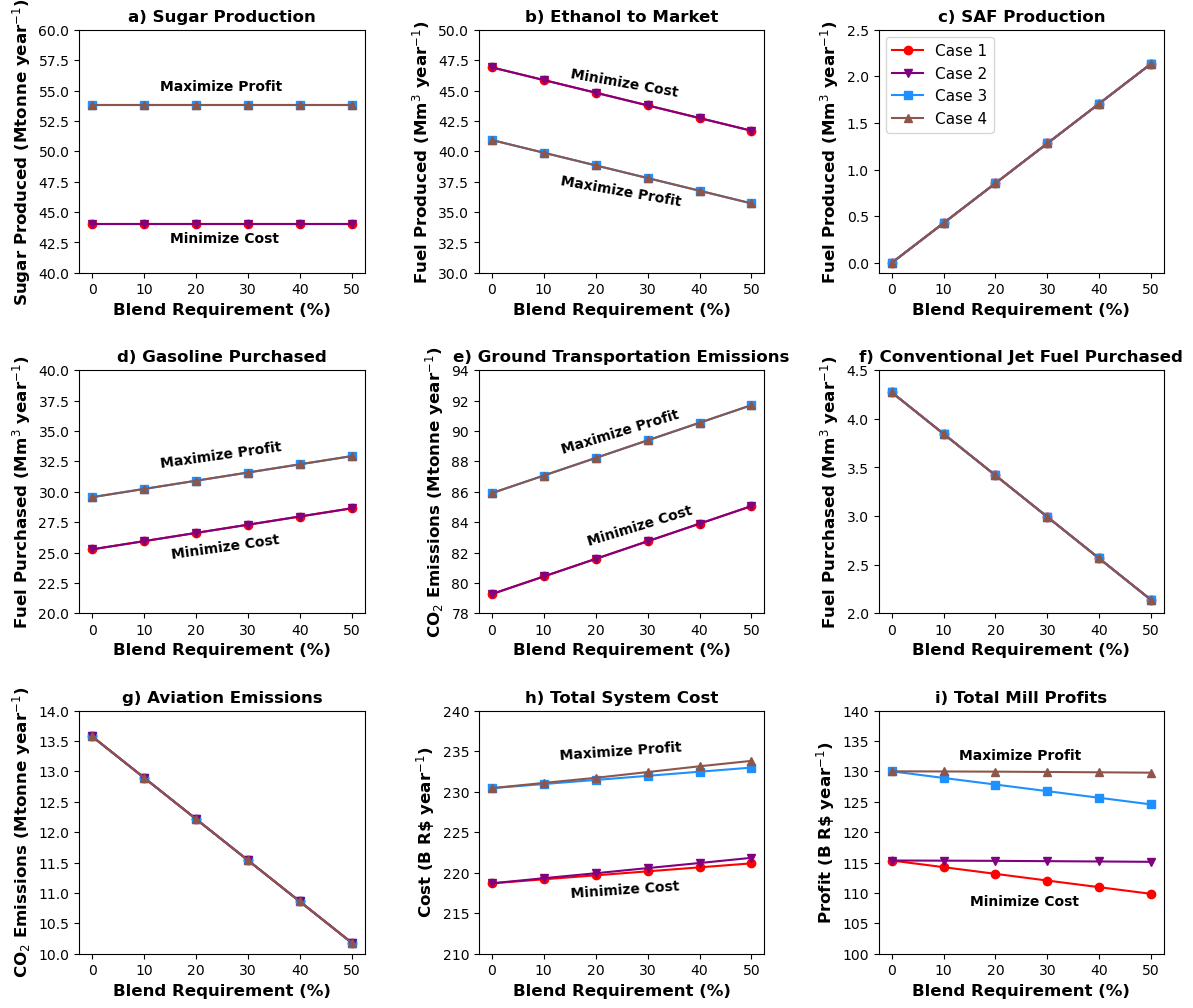

In [15]:
x = [0,10,20,30,40,50]

fig, ax = plt.subplots(3,3, figsize=(14, 12))

#Sugar Production
ax[0,0].plot(np.array(x),Materials[1]['Sugar'], label = 'Case 1', color = 'red', marker='o')
ax[0,0].plot(np.array(x),Materials[3]['Sugar'], label = 'Case 3', color = 'dodgerblue', marker='s')
ax[0,0].plot(np.array(x),Materials[2]['Sugar'], label = 'Case 2',color = 'purple', marker='v')
ax[0,0].plot(np.array(x),Materials[4]['Sugar'], label = 'Case 4', color = 'tab:brown', marker='^')
ax[0,0].set_xlabel('Blend Requirement (%)', fontweight='bold', fontsize=12)
ax[0,0].set_ylim(top = 60, bottom = 40)
ax[0,0].set_title('a) Sugar Production', fontweight = 'bold')
ax[0,0].set_ylabel('Sugar Produced (Mtonne year$^{-1}$)', fontweight='bold', fontsize=12)

#Ethanol Sold to the Market
ax[0,1].plot(np.array(x),Materials[1]['Ethanol (market)'], label = 'Case 1', color = 'red', marker='o')
ax[0,1].plot(np.array(x),Materials[3]['Ethanol (market)'], label = 'Case 3', color = 'dodgerblue', marker='s')
ax[0,1].plot(np.array(x),Materials[2]['Ethanol (market)'], label = 'Case 2', color = 'purple', marker='v')
ax[0,1].plot(np.array(x),Materials[4]['Ethanol (market)'], label = 'Case 4', color = 'tab:brown', marker='^')
ax[0,1].set_xlabel('Blend Requirement (%)', fontweight='bold', fontsize=12)
ax[0,1].set_ylim(top = 50, bottom = 30)
ax[0,1].set_title('b) Ethanol to Market', fontweight = 'bold')
ax[0,1].set_ylabel('Fuel Produced (Mm$^3$ year$^{-1}$)', fontweight='bold', fontsize=12)

#SAF Production
ax[0,2].plot(np.array(x),Materials[1]['SAF'], label = 'Case 1',color = 'red', marker='o')
ax[0,2].plot(np.array(x),Materials[2]['SAF'], label = 'Case 2',color = 'purple', marker='v')
ax[0,2].plot(np.array(x),Materials[3]['SAF'], label = 'Case 3', color= 'dodgerblue', marker='s')
ax[0,2].plot(np.array(x),Materials[4]['SAF'], label = 'Case 4',color = 'tab:brown', marker='^')
ax[0,2].set_xlabel('Blend Requirement (%)', fontweight='bold', fontsize=12)
ax[0,2].set_ylim(top = 2.5)
ax[0,2].set_title('c) SAF Production', fontweight = 'bold')
ax[0,2].set_ylabel('Fuel Produced (Mm$^3$ year$^{-1}$)', fontweight='bold', fontsize=12)
ax[0,2].legend(fontsize = 11, loc = 'upper left')

#External Gasoline Purchased
ax[1,0].plot(np.array(x),Materials[1]['External Gasoline'], label = 'Case 1',color = 'red', marker='o')
ax[1,0].plot(np.array(x),Materials[2]['External Gasoline'], label = 'Case 2',color = 'purple', marker='v')
ax[1,0].plot(np.array(x),Materials[3]['External Gasoline'], label = 'Case 3', color= 'dodgerblue', marker='s')
ax[1,0].plot(np.array(x),Materials[4]['External Gasoline'], label = 'Case 4',color = 'tab:brown', marker='^')
ax[1,0].set_xlabel('Blend Requirement (%)', fontweight='bold', fontsize=12)
ax[1,0].set_ylim(top = 40, bottom = 20)
ax[1,0].set_title('d) Gasoline Purchased', fontweight = 'bold')
ax[1,0].set_ylabel('Fuel Purchased (Mm$^3$ year$^{-1}$)', fontweight='bold', fontsize=12)

#Ground Transportation Emissions
gas_energy = 29520 #Gasoline energy content, MJ/m3
gas_emissions = 75.5 #Gasoline LCA emissions, gCO2/MJ
eth_energy = 21200 #Ethanol energy content, MJ/m3
eth_emissions = 23.1 #Sugarcane ethanol LCA emissions, gCO2/MJ
ax[1,1].plot(np.array(x),((np.array(Materials[1]['Gasoline']) + (np.array(Materials[1]['External Gasoline'])))*gas_energy*gas_emissions/1e6) + (np.array(Materials[1]['Ethanol (market)'])*eth_energy*eth_emissions/1e6), label = 'Case 1', color = 'red', marker='o')
ax[1,1].plot(np.array(x),((np.array(Materials[3]['Gasoline']) + (np.array(Materials[3]['External Gasoline'])))*gas_energy*gas_emissions/1e6) + (np.array(Materials[3]['Ethanol (market)'])*eth_energy*eth_emissions/1e6), label = 'Case 3', color='dodgerblue', marker='s')
ax[1,1].plot(np.array(x),((np.array(Materials[2]['Gasoline']) + (np.array(Materials[2]['External Gasoline'])))*gas_energy*gas_emissions/1e6) + (np.array(Materials[2]['Ethanol (market)'])*eth_energy*eth_emissions/1e6), label = 'Case 2', color = 'purple', marker='v')
ax[1,1].plot(np.array(x),((np.array(Materials[4]['Gasoline']) + (np.array(Materials[4]['External Gasoline'])))*gas_energy*gas_emissions/1e6) + (np.array(Materials[4]['Ethanol (market)'])*eth_energy*eth_emissions/1e6), label = 'Case 4', color = 'tab:brown', marker='^')
ax[1,1].set_xlabel('Blend Requirement (%)', fontweight='bold', fontsize=12)
ax[1,1].set_ylim(top = 94, bottom = 78)
ax[1,1].set_title('e) Ground Transportation Emissions', fontweight = 'bold')
ax[1,1].set_ylabel('CO$_2$ Emissions (Mtonne year$^{-1}$)', fontweight='bold', fontsize=12)

#Conventional Jet Fuel Purchased
ax[1,2].plot(np.array(x),Materials[1]['Conventional Jet Fuel'], label = 'Case 1', color = 'red', marker='o')
ax[1,2].plot(np.array(x),Materials[2]['Conventional Jet Fuel'], label = 'Case 2', color = 'purple', marker='v')
ax[1,2].plot(np.array(x),Materials[3]['Conventional Jet Fuel'], label = 'Case 3', color='dodgerblue', marker='s')
ax[1,2].plot(np.array(x),Materials[4]['Conventional Jet Fuel'], label = 'Case 4', color ='tab:brown', marker='^')
ax[1,2].set_xlabel('Blend Requirement (%)', fontweight='bold', fontsize=12)
ax[1,2].set_ylim(top = 4.5, bottom = 2)
ax[1,2].set_title('f) Conventional Jet Fuel Purchased', fontweight = 'bold')
ax[1,2].set_ylabel('Fuel Purchased (Mm$^3$ year$^{-1}$)', fontweight='bold', fontsize=12)

#Aviation Emissions
jet_energy = 35300 #Energy content of jet fuel, assumed the same for SAF and conventional, MJ/m3
jet_emissions = 90 #LCA emissions of conventional jet fuel, gCO2/MJ
saf_emissions = 45 #LCA emissions estimated for SAF, gCO2/MJ
ax[2,0].plot(np.array(x),(np.array(Materials[1]['Conventional Jet Fuel'])*jet_energy*jet_emissions/1e6) + (np.array(Materials[1]['SAF'])*jet_energy*saf_emissions/1e6), label = 'Case 1', color = 'red', marker='o')
ax[2,0].plot(np.array(x),(np.array(Materials[3]['Conventional Jet Fuel'])*jet_energy*jet_emissions/1e6) + (np.array(Materials[3]['SAF'])*jet_energy*saf_emissions/1e6), label = 'Case 3', color='dodgerblue', marker='s')
ax[2,0].plot(np.array(x),(np.array(Materials[2]['Conventional Jet Fuel'])*jet_energy*jet_emissions/1e6) + (np.array(Materials[2]['SAF'])*jet_energy*saf_emissions/1e6), label = 'Case 2', color = 'purple', marker='v')
ax[2,0].plot(np.array(x),(np.array(Materials[4]['Conventional Jet Fuel'])*jet_energy*jet_emissions/1e6) + (np.array(Materials[4]['SAF'])*jet_energy*saf_emissions/1e6), label = 'Case 4', color ='tab:brown', marker='^')
ax[2,0].set_xlabel('Blend Requirement (%)', fontweight='bold', fontsize=12)
ax[2,0].set_ylim(top = 14, bottom = 10)
ax[2,0].set_title('g) Aviation Emissions', fontweight = 'bold')
ax[2,0].set_ylabel('CO$_2$ Emissions (Mtonne year$^{-1}$)', fontweight='bold', fontsize=12)

#Total Supply Chain Cost
ax[2,1].plot(np.array(x),Cost[1]['Total Cost'], label = 'Case 1',color = 'red', marker='o')
ax[2,1].plot(np.array(x),Cost[2]['Total Cost'], label = 'Case 2',color = 'purple', marker='v')
ax[2,1].plot(np.array(x),Cost[3]['Total Cost'], label = 'Case 3', color='dodgerblue', marker='s')
ax[2,1].plot(np.array(x),Cost[4]['Total Cost'], label = 'Case 4',color = 'tab:brown', marker='^')
ax[2,1].set_xlabel('Blend Requirement (%)', fontweight='bold', fontsize=12)
ax[2,1].set_ylim(top = 240, bottom = 210)
ax[2,1].set_title('h) Total System Cost', fontweight = 'bold')
ax[2,1].set_ylabel('Cost (B R\$ year$^{-1}$)', fontweight='bold', fontsize=12)


#Total Mill Profits
ax[2,2].plot(np.array(x),Cost[1]['Total Profit'], label = 'Case 1', color = 'red', marker='o')
ax[2,2].plot(np.array(x),Cost[2]['Total Profit'], label = 'Case 2', color = 'purple', marker='v')
ax[2,2].plot(np.array(x),Cost[3]['Total Profit'], label = 'Case 3',color= 'dodgerblue', marker='s')
ax[2,2].plot(np.array(x),Cost[4]['Total Profit'], label = 'Case 4',color = 'tab:brown', marker='^')
ax[2,2].set_title('Total Mill Profit', fontweight = 'bold')
ax[2,2].set_ylim(top = 140, bottom = 100)
ax[2,2].set_title('i) Total Mill Profits', fontweight = 'bold')
ax[2,2].set_xlabel('Blend Requirement (%)', fontweight='bold', fontsize=12)
ax[2,2].set_ylabel('Profit (B R\$ year$^{-1}$)', fontweight='bold', fontsize=12)


#Add Annotations
ax[0,0].text(13,55,'Maximize Profit', fontweight = 'bold')
ax[0,0].text(15,42.5,'Minimize Cost', fontweight = 'bold')

ax[0,1].text(15,44.5,'Minimize Cost', fontweight='bold', rotation = -10)
ax[0,1].text(13,35.5,'Maximize Profit', fontweight='bold', rotation = -10)

ax[1,0].text(13,32,'Maximize Profit', fontweight='bold', rotation = 8)
ax[1,0].text(15,24.5,'Minimize Cost', fontweight='bold', rotation = 8)

ax[1,1].text(13,88.5,'Maximize Profit', fontweight='bold', rotation = 17)
ax[1,1].text(18,82.5,'Minimize Cost', fontweight='bold', rotation = 17)

ax[2,1].text(13,234,'Maximize Profit', fontweight='bold', rotation = 4)
ax[2,1].text(15,217,'Minimize Cost', fontweight='bold', rotation = 4)

ax[2,2].text(13,132,'Maximize Profit', fontweight='bold')
ax[2,2].text(15,108,'Minimize Cost', fontweight='bold')

plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.savefig('Results_Figures/ninepanelproductsummary_pos_v2.png',bbox_inches='tight', dpi=500)

plt.show()

# Distance Travelled 

In [16]:
#Calculate the Total Stage 1 and Stage 2 distances travelled for each case study

#Pull connection data between stages
Cases = [1,2,3,4]

distance_data = {}

for i in Cases:
    distance_data[i] = {}
    distance_data[i]['mill_mill'] = {}
    distance_data[i]['mill_ref'] = {}
    distance_data[i]['ref_air'] = {}

    for b in [0,10,20,30,40,50]:
        distance_data[i]['mill_mill'][b] = pd.read_csv(this_file_path + '\\Case' + str(i) + '\\interest_mid_blend_' + str(b) + '\\mill_to_mill_volumes.csv')
        distance_data[i]['ref_air'][b] = pd.read_csv(this_file_path + '\\Case' + str(i) + '\\interest_mid_blend_' + str(b) + '\\ref_to_air_vol_saf.csv')

        if i == 2 or i == 4: #if upgrading at refineries ethanol is transported
            distance_data[i]['mill_ref'][b] = pd.read_csv(this_file_path + '\\Case' + str(i) + '\\interest_mid_blend_' + str(b) + '\\mill_to_ref_vol_eth.csv')
        else: #if upgrading at mills SAF is transported
            distance_data[i]['mill_ref'][b] = pd.read_csv(this_file_path + '\\Case' + str(i) + '\\interest_mid_blend_' + str(b) + '\\mill_to_ref_vol_saf.csv')

#Constant Distance Data
mill_mill_d = pd.read_excel('base_case_data_with_demands.xlsx', sheet_name='mill_distances')
mill_ref_d = pd.read_excel('base_case_data_with_demands.xlsx', sheet_name= 'mill_ref_distances')
ref_air_d = pd.read_excel('base_case_data_with_demands.xlsx', sheet_name= 'ref_air_distances')


In [17]:
#Nominally Calculate the Distance for the 50% Blend case
blend = 50 #Change this value to calculate distances for the other SAF blend cases

#Initialize list of all mills, airports, and refineries for simplicity
mills = distance_data[1]['mill_mill'][blend]['volumes']
refs = distance_data[1]['mill_ref'][blend]['volumes']
air = distance_data[1]['ref_air'][blend]['volumes']

print('------------------------------------------------------------') #for text formatting
for k in Cases:
    print('Case ', k)

    #Stage 0 Distance
    dist = 0 #initialize distance sum
    vol = 0 #initialize volume of ethanol travelled
    eth_density = 789 #kg/m3
    for i in range(len(mills)):
        for j in range(len(mills)):
            if distance_data[k]['mill_mill'][blend][mills[i]][j] > 0.5:
                dist = dist + mill_mill_d[mills[i]][j]
                vol = vol + distance_data[k]['mill_mill'][blend][mills[i]][j]
    print('Stage 0 Total Distance: ', np.round(dist/2,2), 'km') #Divide by two to avoid double counting for the symetric matrix
    print('Stage 0 Volume Distance: ', np.round(dist*vol*eth_density/1000/2/1000000,2), 'Mt*km')

    #Stage 1 Distance
    dist = 0 #initialize distance sum
    vol = 0 #initialize volume of material travelled
    for i in range(len(mills)):
        for j in range(len(refs)):
            if distance_data[k]['mill_ref'][blend][mills[i]][j] > 0.5:
                dist = dist + mill_ref_d[refs[j]][i]
                vol = vol + distance_data[k]['mill_ref'][blend][mills[i]][j]

    if k == 2 or k == 4: #If upgrading at refineries ethanol is transported
        density = 789 #Density of ethanol kg/m3
    else: #If upgrading at mills SAF is transported
        density = 800 #Density of SAF kg/m3

    print('Stage 1 Total Distance: ', np.round(dist,2), 'km') #Divide by two to avoid double counting for the symetric matrix
    print('Stage 1 Volume Distance: ', np.round(dist*vol*density/1000/1000000,2), 'Mt*km')

    #Stage 2 Distance
    dist = 0 #initialize distance sum
    vol = 0 #initialize volume of material travelled
    saf_density = 800 #Density of SAF kg/m3
    for i in range(len(refs)):
        for j in range(len(air)):
            if distance_data[k]['ref_air'][blend][refs[i]][j] > 0.5:
                dist = dist + ref_air_d[refs[i]][j]
                vol = vol + distance_data[k]['ref_air'][blend][refs[i]][j]

    print('Stage 2 Total Distance: ', np.round(dist,2), 'km') #Divide by two to avoid double counting for the symetric matrix
    print('Stage 2 Volume Distance: ', np.round(dist*vol*saf_density/1000/1000000,2), 'Mt*km')
    print('------------------------------------------------------------') #for text formatting

------------------------------------------------------------
Case  1
Stage 0 Total Distance:  345.78 km
Stage 0 Volume Distance:  1064.75 Mt*km
Stage 1 Total Distance:  3460.05 km
Stage 1 Volume Distance:  5913.31 Mt*km
Stage 2 Total Distance:  13182.49 km
Stage 2 Volume Distance:  22529.22 Mt*km
------------------------------------------------------------
Case  2
Stage 0 Total Distance:  0.0 km
Stage 0 Volume Distance:  0.0 Mt*km
Stage 1 Total Distance:  6972.27 km
Stage 1 Volume Distance:  28663.27 Mt*km
Stage 2 Total Distance:  17848.84 km
Stage 2 Volume Distance:  30504.12 Mt*km
------------------------------------------------------------
Case  3
Stage 0 Total Distance:  606.87 km
Stage 0 Volume Distance:  2002.05 Mt*km
Stage 1 Total Distance:  762.71 km
Stage 1 Volume Distance:  1303.49 Mt*km
Stage 2 Total Distance:  33461.32 km
Stage 2 Volume Distance:  57186.25 Mt*km
------------------------------------------------------------
Case  4
Stage 0 Total Distance:  0.0 km
Stage 0 Volu

# Net Emissions Sensitivity

In [18]:
#Define an equation to calculate the net emissions from increasing the SAF blend rate from 0% to 50%
def net_emissions(saf_co2, saf_conv):
    '''
    This function calculates the net emissions from increasing the SAF blend rate from 0% to 50%.

    Inputs: 
    
            saf_co2: LCA emissions of SAF, units: gCO2/MJ
            saf_conv: conversion rate of ethanol to SAF, units: m3 saf/m3 eth

    Returns: net emissions
    '''

    #Nominal values include:
    #The total SAF required for 50% blend: 2140000 m3/year
    #The energy content of ethanol: 21200 MJ/m3
    #The difference between gasoline and ethanol LCA emissions: 52.4 gCO2/MJ
    #The energy content of SAF: 35300 MJ/m3
    #The LCA emissions of conventional jet fuel: 90 gCO2/MJ
    emissions = (2140000/saf_conv)*21200*(52.4)/1e12 + -2140000*35300*(90-saf_co2)/1e12
    return emissions
 
print('Nominal Case Net Emissions: ', np.round(net_emissions(45,0.41),1), ' Mtonne CO2 per year')

Nominal Case Net Emissions:  2.4  Mtonne CO2 per year


In [19]:
#Create Mesh for the contour plot
saf_co2 = np.linspace(0,50,51) #define a range of SAF emissions
saf_conv = np.linspace(0.2,1,11) #define a range of SAF conversion rates

l,c = np.meshgrid(saf_co2,saf_conv)

emissions = net_emissions(saf_co2=l, saf_conv=c) #Solve the net emissions for each grid point

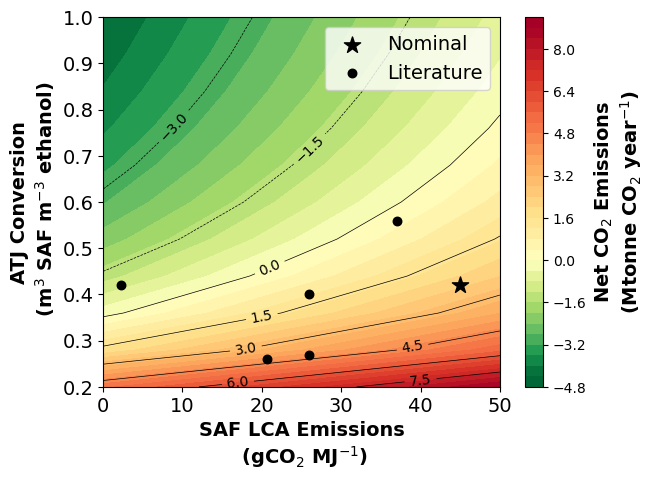

In [20]:
from matplotlib.colors import TwoSlopeNorm
#Generate Plot
fig, ax = plt.subplots()

norm = TwoSlopeNorm(vmin=np.min(emissions), vcenter=0, vmax=np.max(emissions)) #Center the contour lines on zero to emphasize when SAF causes net emission reductions


plt.contourf(l,c,emissions, cmap='RdYlGn_r',levels=40, norm = norm)
cbar=plt.colorbar()
c3 = plt.contour(l,c,emissions, colors='black', linewidths=0.5, levels=12)
plt.scatter(45,0.42, color="black",s=150, label = "Nominal", marker = "*") #Plotting nominal values (see SI Section S5.3)

#Additional Points from the literature (See SI Section S5.3)
plt.scatter(2.3,0.42, color="black",s=150, label = "Literature", marker = ".")
plt.scatter(20.7,0.26, color="black",s=150, marker = ".") 
plt.scatter(26,0.40, color="black",s=150, marker = ".") 
plt.scatter(37,0.56, color="black",s=150, marker = ".") 
plt.scatter(26,0.27, color="black",s=150, marker = ".") 

#Figure Formatting
plt.xlabel('SAF LCA Emissions\n (gCO$_2$ MJ$^{-1}$)',weight = 'bold', fontsize=14)
plt.legend(loc ='upper right', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.clabel(c3, c3.levels, inline=True, fontsize=10)
plt.ylabel('ATJ Conversion\n (m$^3$ SAF m$^{-3}$ ethanol)',weight = 'bold', fontsize=14)
cbar.set_label('Net CO$_2$ Emissions\n(Mtonne CO$_2$ year$^{-1}$)',weight = 'bold', fontsize=14)
plt.savefig('Results_Figures/emissions_sensitivity.png',bbox_inches='tight')
plt.show()